In [99]:
import pandas as pd

# read input data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

train.info()
train.head()

# SibSp: 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
# Parch: 동반한 Parent(부모) Child(자식)의 수
# Cabin: 객실 번호
# Embarked: 승선 항구

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
# Subgroup Analysis (groupby)
# Pclass : 등급이 높을수록 생존율이 높음
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().round(2)


,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [101]:
# Sex : 여성이 남성보다 생존율이 높음 (구명보트 탑승 우선: 여성/어린이)
train[['Sex', 'Survived']].groupby(['Sex']).mean().round(2)

,Survived
Sex,
female,0.74
male,0.19


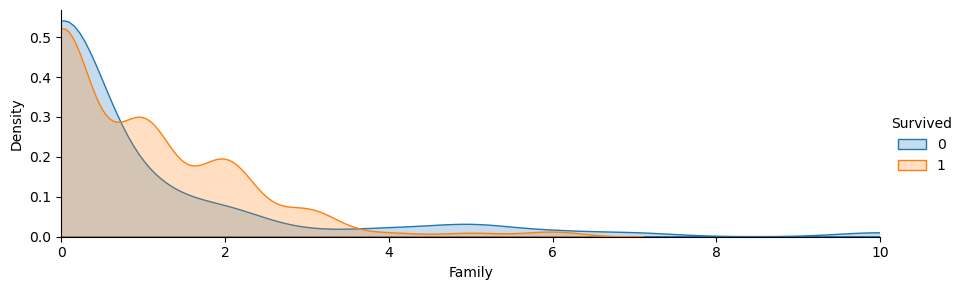

,Survived
Family,
0,0.30
1,0.55
2,0.58
3,0.72
4,0.20
5,0.14
6,0.33
7,0.00
10,0.00


In [102]:
train['Family'] = train['SibSp'] + train['Parch']

import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(train, hue='Survived',aspect=3)
facet.map(sns.kdeplot,'Family', fill=True)
facet.set(xlim=(0, train['Family'].max()))
facet.add_legend()
plt.show()

# Family : 혼자보다는 가족이 있는 편이 생존율이 높음
train[['Family', 'Survived']].groupby(['Family']).mean().round(2)


In [103]:
# Embarked -> 연관성 높아 보이지 않음
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().round(2)

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


In [104]:
# 학습 데이터 선정 및 수정 (Pclass, Sex->SexIndex, Age->AgeGroup, Family, Fair->FairGroup) 

train['Age'].fillna(train['Age'].mean(axis=0), inplace=True)

# AgeGroup
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
train["AgeGroup"] = pd.cut(train['Age'], ranges, right=False, labels=labels)

# FareGroup
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
train["FareGroup"]=pd.cut(train['Fare'], ranges ,right=False, labels=labels)

# SexIndex
train['SexIndex'] = train['Sex'].apply(lambda x:1 if (x=='female') else 0)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,AgeGroup,FareGroup,SexIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,0


In [105]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Family         891
AgeGroup       891
FareGroup      891
SexIndex       891
dtype: int64

In [123]:
trn_data = train.loc[:790, ['Pclass','SexIndex','AgeGroup','FareGroup','Family']]
tst_data = train.loc[791:, ['Pclass','SexIndex','AgeGroup','FareGroup','Family']]

trn_lbl = train.loc[:790, 'Survived']
tst_lbl = train.loc[791:, 'Survived']

# one-hot encoding
from keras.utils import to_categorical
trn_lbl1 = to_categorical(trn_lbl)
tst_lbl1 = to_categorical(tst_lbl)

# importing Keras models and layers
from keras import models
from keras import layers

# creating sequential model
nnet = models.Sequential()

# adding a hidden layer
nnet.add(layers.Dense(64, activation="relu", input_shape=(5,)))

# adding a hidden layer
nnet.add(layers.Dense(32, activation="relu"))

# adding an output layer
nnet.add(layers.Dense(2, activation="softmax"))

nnet.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                384       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2530 (9.88 KB)


Trainable params: 2530 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
import tensorflow as tf

nnet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

res = nnet.fit(trn_data, trn_lbl1, epochs=10, batch_size=50, validation_data=(tst_data, tst_lbl1))

KNN   : 76.69
DecisionTree : 78.65
RandomForest : 78.51
SVM   : 82.44


In [18]:
#SVM으로 모델을 훈련하자
sv.fit(data,target)

SVC(gamma='auto')

In [19]:
#test 데이터도 train과 동일하게 데이터가공
test['Familysize']=test['SibSp'] + test['Parch']
#age 결측치 처리
#평균으로 결측치 채우기
test['Age'].fillna(test['Age'].mean(axis=0),inplace=True)

# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
test["AgeGroup"]=pd.cut(test['Age'],ranges,right=False,labels=labels)
                        
# fare 구간화
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
test["FareGroup"]=pd.cut(test['Fare'],ranges,right=False,labels=labels)

#성별을 숫자로 매핑
test['SexNum']=test['Sex'].apply(lambda x:1 if (x=='female') else 0)
                        
#embarked을 숫자로 매핑
test['EmbarkedNum']=test['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))
                        
test_data = test[['Pclass','SexNum','AgeGroup','FareGroup','EmbarkedNum','Familysize']]
print(test_data)

     Pclass  SexNum AgeGroup FareGroup  EmbarkedNum  Familysize
0         3       0        2         0            2           0
1         3       1        3         0            0           1
2         2       0        4         0            2           0
3         3       0        2         0            0           0
4         3       1        1         0            0           2
..      ...     ...      ...       ...          ...         ...
413       3       0        2         0            0           0
414       1       1        3         3            1           0
415       3       0        3         0            0           0
416       3       0        2         0            0           0
417       3       0        2         1            1           2

[418 rows x 6 columns]


In [20]:
pred = sv.predict(test_data)

c:\Users\witty\anaconda3\envs\mylab\Lib\site-packages\pandas\core\arrays\base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [21]:
submission = pd.DataFrame({
"PassengerId":test['PassengerId'],
"Survived": pred
})
  
submission.to_csv('submission.csv',index=False)

In [23]:
submissionfile = pd.read_csv('submission.csv')

print(submissionfile.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
